# Описание данных

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

Первый датасет "Hypothesis":
 - Hypothesis — краткое описание гипотезы;
 - Reach — охват пользователей по 10-балльной шкале;
 - Impact — влияние на пользователей по 10-балльной шкале;
 - Confidence — уверенность в гипотезе по 10-балльной шкале;
 - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
 
Второй датасет "orders":
 - transactionId — идентификатор заказа;
 - visitorId — идентификатор пользователя, совершившего заказ;
 - date — дата, когда был совершён заказ;
 - revenue — выручка заказа;
 - group — группа A/B-теста, в которую попал заказ.
 
Третий датасет "visitors":
 - date — дата;
 - group — группа A/B-теста;
 - visitors — количество пользователей в указанную дату в указанной группе A/B-теста
 


# Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
import warnings

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [3]:
# функция для обзора данных

def observe_data(data):
    print("\033[1m\033[34m {}".format('Первые 10 строк датасета:'))
    display(data.head(10))
    print("\033[1m\033[34m {}".format('Числовое описание данных:'))
    display(data.describe())
    print("\033[1m\033[34m {}".format('Общая информация о датасете:'))
    print("\033[0m {}".format(''))
    data.info()
    print()
    print("\033[1m\033[34m {}".format('Пропуски в данных:'))
    display(data.isna().sum())
    print("\033[1m\033[34m {}".format('Дубликаты:'))
    display(data.duplicated().sum())

In [4]:
pd.options.display.max_colwidth = 150
observe_data(hypothesis)

 Первые 10 строк датасета:


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


 Числовое описание данных:


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


 Общая информация о датасете:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

 Пропуски в данных:


Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

 Дубликаты:


0

In [5]:
observe_data(orders)

 Первые 10 строк датасета:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


 Числовое описание данных:


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


 Общая информация о датасете:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

 Пропуски в данных:


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

 Дубликаты:


0

In [6]:
observe_data(visitors)

 Первые 10 строк датасета:


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


 Числовое описание данных:


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


 Общая информация о датасете:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

 Пропуски в данных:


date        0
group       0
visitors    0
dtype: int64

 Дубликаты:


0

In [7]:
# меняем стиль названия столбцов и тип столбцов 

hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = [x.replace('Id', '_id') for x in orders.columns]
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

display(hypothesis.columns)
orders.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

# Приоритизация гипотез

## ICE

In [8]:
# применяем фреймворк ICE для приоритизации гипотез

hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis.sort_values(by='ICE', ascending=False).round(2)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Самые перспективные гипотезы по методу ICE:
 - Запустить акцию, дающую скидку на товар в день рождения (8)
 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0)
 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7)

## RICE

In [9]:
# применяем фреймворк RICE для приоритизации гипотез

hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis.sort_values(by='RICE', ascending=False).round(2)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Самые перспективные гипотезы по методу RICE:
 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	(7)
 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	(2)
 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0)

## Вывод

 - При использовании метода  RICE самая перспективная гипотеза - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" (7). 
 - С третьего места при методе ICE на первое при использовании метода RICE эта гипотеза передвинулась потому, что добавился показатель в числитель при вычислениях, и у этой гипотезы он высокий. Метод RICE учитывает, какое количество пользователей затронет гипотеза, а метод ICE - нет.
 - При проверке 7 гипотезы будет затронуто самое большое количество пользователей при одинаковом количестве затрат ресурсов с 8 гипотезой.

# Анализ A/B-теста

In [10]:
both_groups = orders['visitor_id'].nunique() - (orders[orders['group'] == 'A']['visitor_id'].nunique()) - (orders[orders['group'] == 'B']['visitor_id'].nunique())
display(both_groups)
display(abs(both_groups) / orders[orders['group'] == 'A']['visitor_id'].nunique() * 100)
display(abs(both_groups) / orders[orders['group'] == 'B']['visitor_id'].nunique() * 100)
abs(both_groups) / orders['visitor_id'].nunique() * 100

-58

11.530815109343937

9.897610921501707

5.625606207565471

**Вывод:**
 - По результатам вычислений получается, 58 пользователей, участвующих в обеих группах
 - В группе А это 11.5% от пользователей
 - В группе В это 9.8% от пользователей
 - От общего числа пользователей - это 5.6%

Поскольку от общего числа пользователей это всего лишь 5.6%, то этих повторяющихся пользователей можем оставить, они не повлияют критически на результаты исследования

## График кумулятивной выручки по группам

In [11]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# собираем агрегированные кумулятивные данные о заказах по дням
ordersAggregated = (
    datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                      .agg({'date' : 'max',
                            'group' : 'max',
                            'transaction_id' : 'nunique',
                            'visitor_id' : 'nunique',
                            'revenue' : 'sum'}), 
                      axis=1)
                      .sort_values(by=['date','group']))

# собираем агрегированные кумулятивные данные о посетителях по дням
visitorsAggregated = (
    datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                      .agg({'date' : 'max',
                            'group' : 'max',
                            'visitors' : 'sum'}),
                      axis=1)
                      .sort_values(by=['date','group']))

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated,
                                        left_on=['date', 'group'],
                                        right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


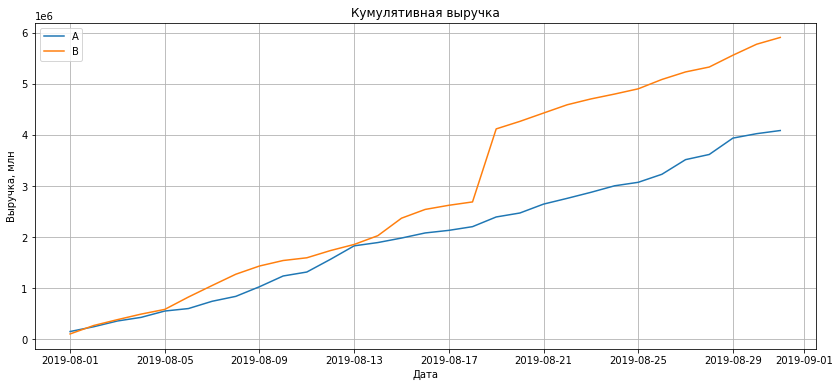

In [12]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням 
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(14, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка')
plt.xlabel('Дата')
plt.ylabel('Выручка, млн')
plt.grid(True)
plt.legend();

**Вывод:**
 - Выручка группы А растет постепенно, без резких скачков
 - Выручка группы В больше выручки группы А с 5-го дня исследования
 - В группе В есть резкий рост выручки примерно на 19 день исследования, возможно в этой группе есть аномальные значения (дорогие заказы)

## График кумулятивного среднего чека по группам

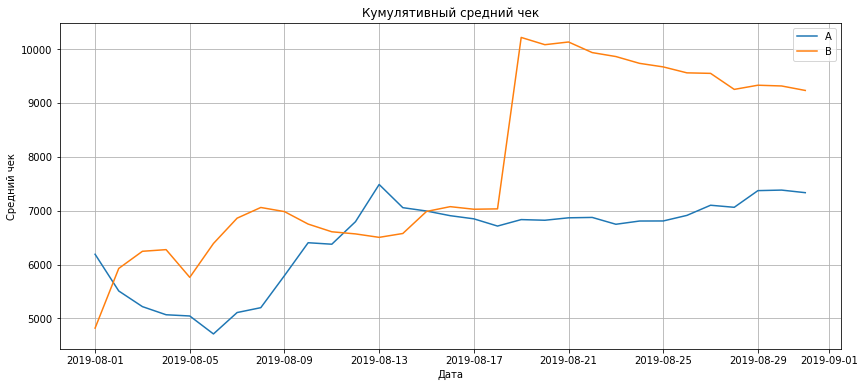

In [13]:
# графики среднего чека по группам — делим кумулятивную выручку на кумулятивное число заказов

plt.figure(figsize=(14, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid(True)
plt.legend();

**Вывод:**
 - Снова видим резкий рост на 19 день в группе В
 - В группе А также стали заметны выбросы: на 6 и 13 день
 - Теперь у нас больше оснований предполагать аномальные значения

## График относительного изменения кумулятивного среднего чека группы B к группе A

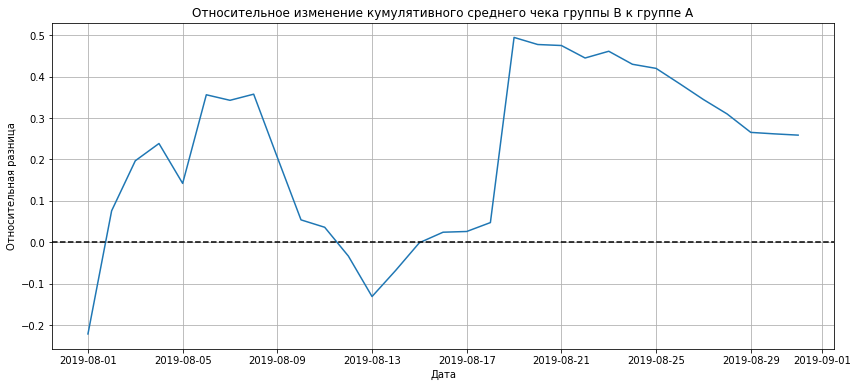

In [14]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date',
                                                   right_on='date',
                                                   how='left',
                                                   suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(14, 6))
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительная разница')
plt.grid(True);

**Вывод:**
 - Изменение чека группы В к группе А также колеблется
 - Вероятнее всего выбросы были на 13 и 19 день, также могут быть аномальные значения на 5 день

## График кумулятивного среднего количества заказов на посетителя по группам

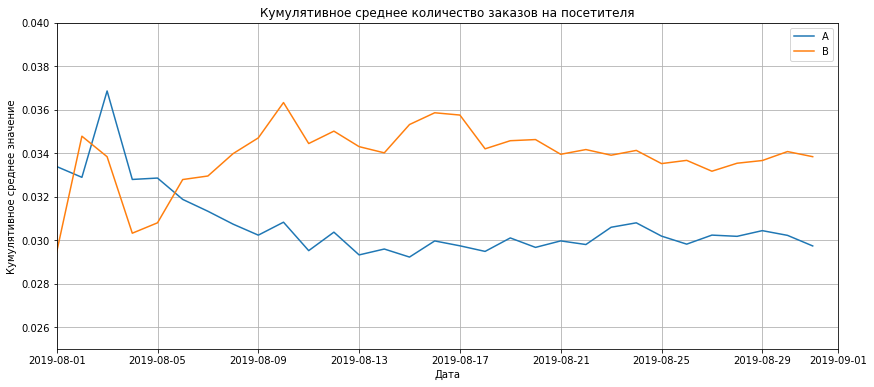

In [15]:
# считаем кумулятивную конверсию и добавляем столбец
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(14, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивное среднее количество заказов на посетителя')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее значение')
plt.legend()
plt.grid(True)

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.025, 0.04]);

**Вывод:**
 - Кумулятивное среднее количество заказов на посетителя колебалось в первые дни исследования, но после 6 дня стало стабильным
 - Кумулятивное среднее группы В выше, чем группы А

## График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

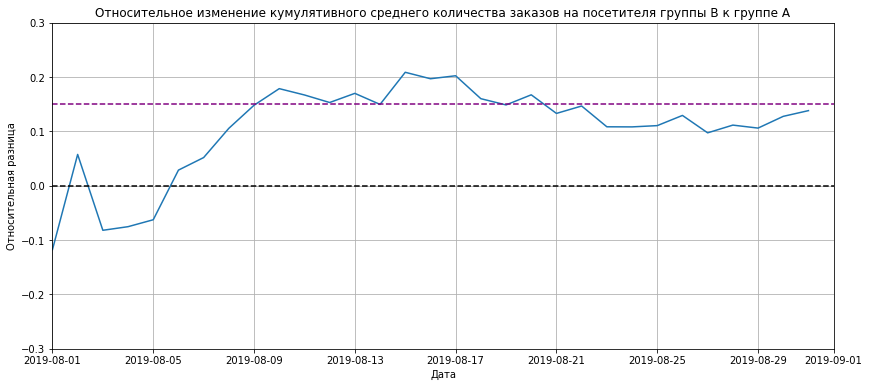

In [16]:
# объединяем данные в одну таблицу
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],
                                                                           left_on='date',
                                                                           right_on='date',
                                                                           how='left',
                                                                           suffixes=['A', 'B'])

plt.figure(figsize=(14, 6))
plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительная разница')
plt.grid(True)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='purple', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.3, 0.3]);

**Вывод:**
 - Начиная с 5 дня исследования кумулятивное среднее количество заказов на посетителя группы В выше кумулятивного среднего группы А
 - Максимальное различие кумулятивного среднего количества заказов на посетителя было 20%, большую часть времени оно колеблется около 15%

## Точечный график количества заказов по пользователям

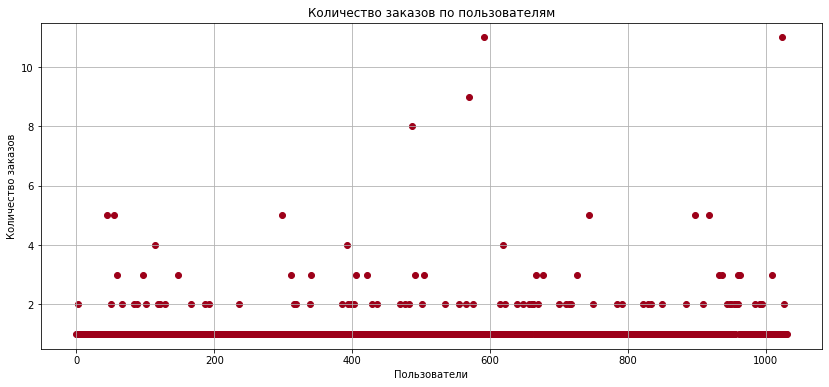

In [17]:
# находим число заказов по пользователям
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(14,6))
plt.scatter(x_values, ordersByUsers['orders'], color='#9D0019')
plt.title('Количество заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
plt.grid(True);

**Вывод:**
 - В основном пользователи делают один заказ
 - Некоторая часть пользователей делает 2 и 3 заказа
 - Есть пара аномальных значений с 8-10 заказами
 - Стоит определить долю пользователей по количеству заказов, чтобы точно установить, что считать аномальным значением

## Выборочные перцентили количества заказов на пользователя

In [18]:
# считаем 95 и 99 перцентили

np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

**Вывод:**
 - Меньше 5% пользователей делают больше 2 заказов
 - Меньше 1% пользователей делают больше 4 заказов
 - Аномальных пользователей будем определять с количеством заказов больше 4

## Точечный график стоимостей заказов

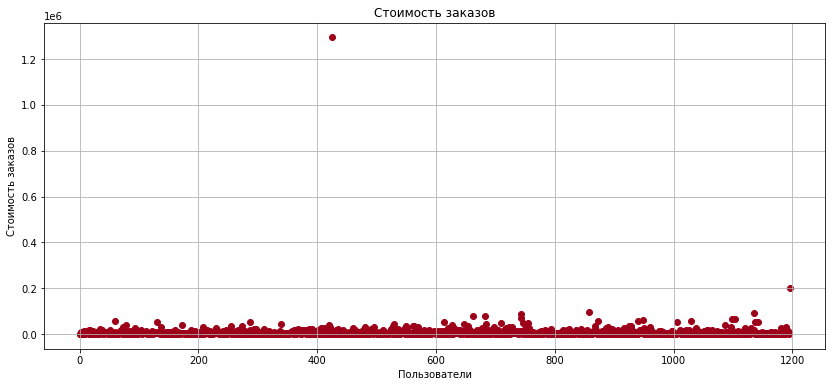

In [19]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(14,6))
plt.scatter(x_values, orders['revenue'], color='#9D0019')
plt.title('Стоимость заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.grid(True);

**Вывод:**
 - Видим два выброса
 - Заказ за 200 000 руб.
 - Заказ более 1 200 000 руб.

## Выборочные перцентили стоимости заказов

In [20]:
# считаем 95 и 99 перцентили

np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

**Вывод:**
 - Меньше 5% заказов стоимостью более 28 000 руб.
 - Меньше 1% заказов стоимостью более 58 300 руб.
 - Заказы выше 58 300 руб. будем считать аномальными значениями

## Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [21]:
# создаем таблицы с количеством ежедневных посещений в группах
# таблицы с ежедневными количествами заказов, их стоимостями и количество посетителей по датам
# те же таблицы, но с кумулятивными значениями

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [22]:
# создаем переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders'], 
# где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [23]:
# количество заказов пользователей, включая пользователй без заказов

sampleA = pd.concat(
    [ordersByUsersA['orders'],
     pd.Series(0, 
               index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
               name='orders')],axis=0)

sampleB = pd.concat(
    [ordersByUsersB['orders'],
     pd.Series(0, 
               index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
               name='orders')],axis=0)

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Для проверки данных будем использовать тест Манна-Уитни. Поскольку были обнаружены аномальные значения, а характер распределения количества заказов не относится к нормальному, такой тест подойдет больше. Сформулируем гипотезы:
 - Н0: различий в среднем количестве заказов на посетителя между группами нет
 - Н1: различия в среднем количестве заказов на посетителя между группами есть

In [24]:
alpha=0.05

# применяем критерий Манна-Уитни
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# рассчитываем относительный прирост среднего группы В относительно А
print("Относительная разница: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
Относительная разница: 0.138


**Вывод:**

 - P_value равен 0.017, значит при alpha=0.05 можем отвергнуть нулевую гипотезу: между группами А и В есть различия в среднем количестве заказов на посетителя
 - Относительный прирост среднего количества заказов на посетителя группы B к группе A равен 0.138 (т.е. 13.8%)

## Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
 - Н0: различий в среднем чеке между группами нет
 - Н1: различия в среднем чеке между группами есть

In [25]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                            orders[orders['group']=='B']['revenue'])[1]))
print('Относительная разница: {0:.3f}'.format(orders[orders['group']=='B']['revenue']
                         .mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
Относительная разница: 0.259


**Вывод:**
 - P_value равен 0.729
 - При alpha=0.05 отвергнуть нулевую гипотезу мы не можем, значит различий в среднем чеке между группами нет
 - Относительное различие среднего чека между группами  равно 0.259 (т.е. 25.9%), это результат по "сырым" данным, нужно проанализировать "очищенные" данные

## Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [26]:
# сделаем срезы аномальных пользователей

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsersA['orders'], 99)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsersA['orders'], 99)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head())
display(abnormalUsers.shape[0])
abnormalUsers.shape[0]/orders['visitor_id'].nunique()

1099    148427295
18      199603092
23      237748145
949     887908475
744     888512513
dtype: int64

20

0.019398642095053348

In [27]:
# создаем переменные с очищенными данными о заказах — не включая аномальных пользователей

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Гипотезы:
- Н0: различий в среднем количестве заказов на посетителя между группами нет
- Н1: различия в среднем количестве заказов на посетителя между группами есть

In [28]:
# применяем критерий Манна-Уитни
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

# рассчитываем относительный прирост среднего группы В относительно А
print('Относительная разница: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.014
Относительная разница: 0.151


**Вывод:**
 - P_value равен 0.014
 - При alpha=0.05 отвергаем нулевую гипотезу, значит, по "очищенным" данным различия в среднем количестве заказов на посетителя между группами есть 
 - Относительный прирост среднего количества заказов на посетителя группы B к среднему группы A равен 0.151 (т.е. 15.1%)

## Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

 - Н0: различий в среднем чеке между группами нет
 - Н1: различия в среднем чеке между группами есть

In [29]:
# применяем критерий Манна-Уитни
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)
# рассчитываем относительное увеличение среднего чека группы В относительно А
print(
    "Относительная разница: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        
        
        - 1
    )
)

p-value: 0.959
Относительная разница: -0.014


**Вывод:**
 - P_value равен 0.959
 - При alpha=0.05 не получается отвергнуть нулевую гипотезу, значит, статистически значимых различий в среднем чеке между группами нет
 - Средний чек группы В ниже среднего чека группы А на 1%
 - Удаление аномальных значений привело к более точным результатам

# Выводы

По результатам А/В-теста рекомендую остановить тестирование и зафиксировать победу группы В, т.к:
 - наблюдается различие в среднем количестве заказов на посетителя между группами, среднее количество заказов на посетителя в группе В больше среднего количества заказов на посетителя в группе А на 15.3%
 - статистически значимого различия в среднем чеке между группами нет